In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sys
from scipy import stats
import calendar

# Function to Generate BAN Doughnut

In [70]:
def generate_BAN_doughnut(df, column, seg_colors, wk1, **kwargs):
    
    """
    Function to generate a BAN doughnut plot
    df: dataframe. 
    column: column in df that we want to plot
    seg_colors: list of 4 colors to colour the plot. First colour is the lower quartile and the fourth is the 
    upper quartile
    wk1: index of the row in you you want to plot
    """
    
    unit = ''
    if 'unit' in kwargs:
        unit = kwargs['unit']
    
    # percentiles
    pc_eng_50 = df[column].median()
    pc_eng_25 = np.percentile(np.array(df[column]),25)
    pc_eng_75 = np.percentile(np.array(df[column]),75)

    # Work out the percentile rank of each datapoint
    df['pc_rank'] = df[column].apply(lambda x: stats.percentileofscore(np.array(df[column]),x))
    
    # Set radius of pie chart
    rad0 = 1

    if 'ax' in kwargs:
        ax = kwargs['ax']
    else:
        f, ax = plt.subplots(1,1,figsize=(7,7))
        
    # Set colors based on percentile
    if df.loc[wk1,'pc_rank'] < 25:
        colors0 = seg_colors[0]
    elif (df.loc[wk1,'pc_rank'] < 50):
        colors0 = seg_colors[1]
    elif (df.loc[wk1,'pc_rank'] < 75):
        colors0 = seg_colors[2]
    else:
        colors0 = seg_colors[3]

    colors0 = ['lightgrey']+[colors0]

    ax.pie(
        [100-df.loc[wk1,'pc_rank'],df.loc[wk1,'pc_rank']],
        colors=colors0,
        startangle=90,
        radius=rad0
    )
    my_circle=plt.Circle( (0,0), 0.7*rad0, color='white')

    ax.add_artist(my_circle)

    ax.text(
        0,0,
        str(round(df.loc[wk1,column],2)) + unit,
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 70,
        color = colors0[1]
    )

    # --- Add white triangles at 90 degree intervals
    # Set coordinates clockwise from midnight
    # Internal coordinates need to go further into the circle beacause of the curvature

    # Size of indents: h0 = height, b0 = base length
    h0 = 0.03
    b0 = 2*h0/(np.sqrt(3))
    # rotation of coordinates by 90degrees we can multiply by the following matrix
    theta = np.array([[np.math.cos(np.math.pi/2),np.math.sin(np.math.pi/2)],[np.math.sin(np.math.pi/2),-np.math.cos(np.math.pi/2)]])

    # - Midnight, external:
    x1e = [0.5*b0,0,-0.5*b0]
    y1e = [1,1-h0,1]
    xy1e = np.array([x1e,y1e])
    ax.fill(x1e,y1e,'white')
    x1i = [0,0.5*b0*2,-0.5*b0*2]
    y1i = [0.7*rad0+h0,0.7*rad0-h0,0.7*rad0-h0]
    xy1i = np.array([x1i,y1i])
    ax.fill(x1i,y1i,'white')

    # 3 o'clock
    xy1e = np.matmul(theta,xy1e)
    xy1i = np.matmul(theta,xy1i)
    ax.fill(xy1e[0],xy1e[1],'white')
    ax.fill(xy1i[0],xy1i[1],'white')

    # 6 o'clock
    xy1e = np.matmul(theta,xy1e)
    xy1i = np.matmul(theta,xy1i)
    ax.fill(xy1e[0],-xy1e[1],'white')
    ax.fill(xy1i[0],-xy1i[1],'white')

    # 9 o'clock
    xy1e = np.matmul(theta,xy1e)
    xy1i = np.matmul(theta,xy1i)
    ax.fill(-xy1e[0],xy1e[1],'white')
    ax.fill(-xy1i[0],xy1i[1],'white')

    if 'title' in kwargs:
        ax.set_title(kwargs['title'], fontsize = 16, color = 'grey')
    
    if 'ax' not in kwargs:
        plt.show()
    
    if 'filename' in kwargs:
        f.savefig(filename, dpi = 500, bbox_inches = 'tight')

# Load Melbourne Temperate Data

In [129]:
df = pd.read_csv('australian_temp.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%y')

In [130]:
df.head()

,id,Date,Temp,Month,Year
0,0,1981-01-01,20.7,1,1981
1,1,1981-01-02,17.9,1,1981
2,2,1981-01-03,18.8,1,1981
3,3,1981-01-04,14.6,1,1981
4,4,1981-01-05,15.8,1,1981


# Generate Plots

In [139]:
def generate_title(date, include_day = True):
    
    if str(date.day)[-1] == '1':
        suffix = 'st'
    elif str(date.day)[-1] == '2':
        suffix = 'nd'
    elif str(date.day)[-1] == '3':
        suffix = 'rd'
    else:
        suffix = 'th'
        
    if include_day:
        title = str(date.day) + suffix + ' ' + calendar.month_name[date.month][:3] + ' ' + str(date.year)
    else:
        title = calendar.month_name[date.month][:3] + ' ' + str(date.year)
    return title

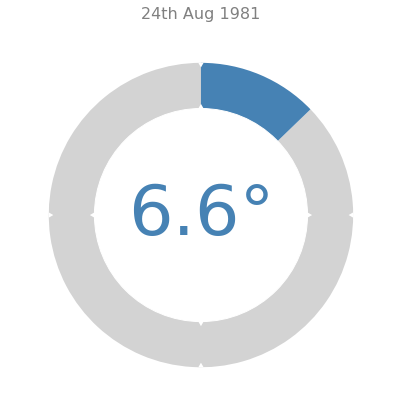

In [132]:
generate_BAN_doughnut(
    df, 
    'Temp',
    ['steelblue', 'lightsteelblue', 'mistyrose', 'firebrick'], 
    235,
    unit = '°',
    title = generate_title(df.loc[235, 'Date'])
)

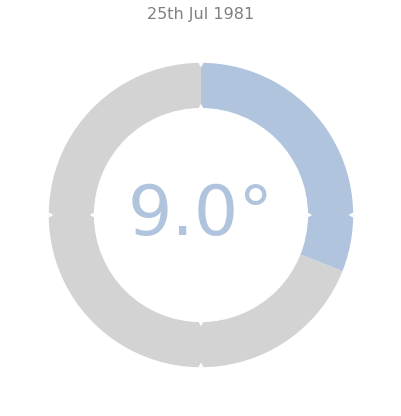

In [133]:
generate_BAN_doughnut(
    df, 
    'Temp',
    ['steelblue', 'lightsteelblue', 'mistyrose', 'firebrick'], 
    205,
    unit = '°',
    title = generate_title(df.loc[205, 'Date'])
)

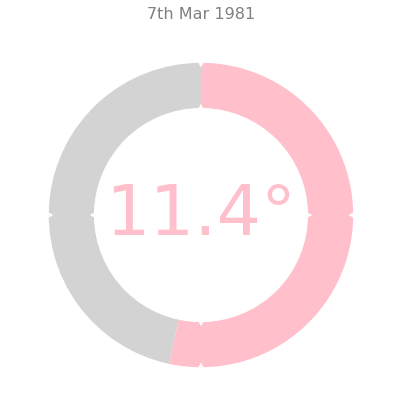

In [134]:
generate_BAN_doughnut(
    df, 
    'Temp',
    ['steelblue', 'lightsteelblue', 'pink', 'firebrick'], 
    65,
    unit = '°',
    title = generate_title(df.loc[65, 'Date'])
)

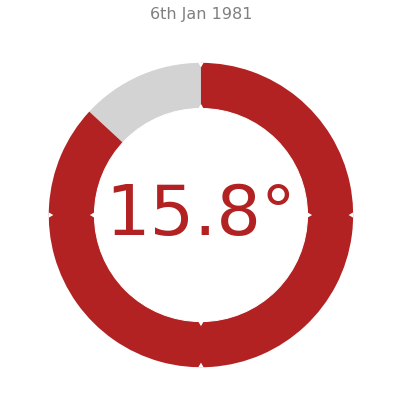

In [135]:
generate_BAN_doughnut(
    df, 
    'Temp',
    ['steelblue', 'lightsteelblue', 'mistyrose', 'firebrick'], 
    5,
    unit = '°',
    title = generate_title(df.loc[5, 'Date'])
)

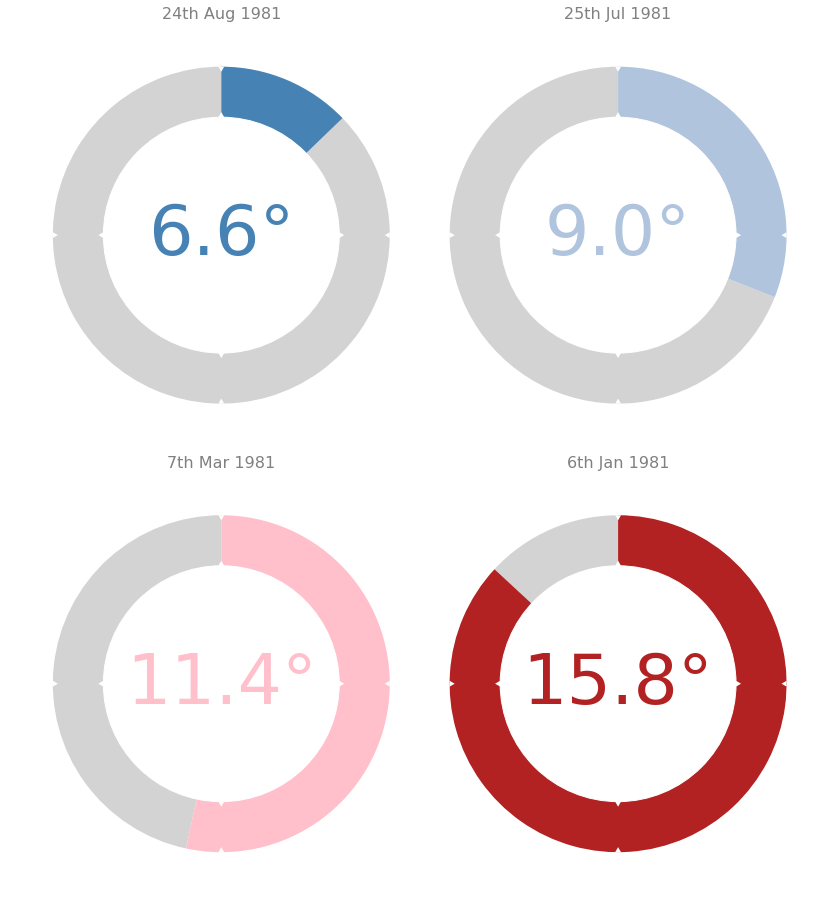

In [136]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
plt.subplots_adjust(hspace = 0.065, wspace = -0.2)
days_to_plot = [235, 205, 65, 5]

for i, day in enumerate(days_to_plot):
    
    if i == 0:
        ax = axs[0, 0]
    elif i == 1:
        ax = axs[0, 1]
    elif i == 2:
        ax = axs[1, 0]
    elif i == 3:
        ax = axs[1, 1]

    generate_BAN_doughnut(
        df,
        'Temp', ['steelblue', 'lightsteelblue', 'pink', 'firebrick'],
        day,
        unit='°',
        title=generate_title(df.loc[day, 'Date']),
        ax=ax)
    
fig.savefig('Figures/temperature_plots', dpi = 500, bbox_inches = 'tight')

# Load Air Passengers Dataset

In [142]:
df = pd.read_csv('air_passengers.csv')
df['Date'] = pd.to_datetime(df['index'])
df.head()

,index,value,Date
0,1949 Jan,112,1949-01-01
1,1949 Feb,118,1949-02-01
2,1949 Mar,132,1949-03-01
3,1949 Apr,129,1949-04-01
4,1949 May,121,1949-05-01


# Generate Plots

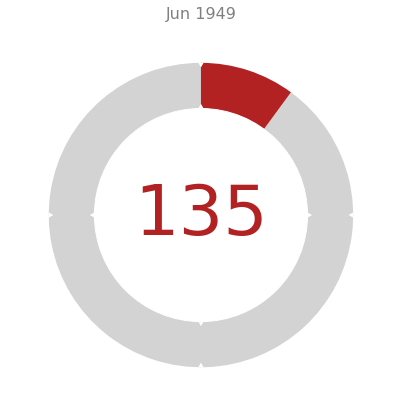

In [143]:
generate_BAN_doughnut(
    df, 
    'value',
    ['firebrick', 'gold', 'gold', 'forestgreen'], 
    5,
    title = generate_title(df.loc[5, 'Date'], include_day = False)
)

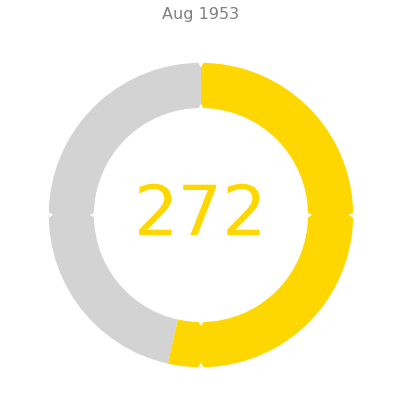

In [147]:
generate_BAN_doughnut(
    df, 
    'value',
    ['firebrick', 'gold', 'gold', 'forestgreen'], 
    55,
    title = generate_title(df.loc[55, 'Date'], include_day = False)
)

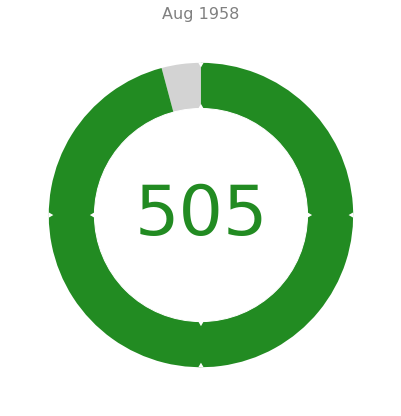

In [148]:
generate_BAN_doughnut(
    df, 
    'value',
    ['firebrick', 'gold', 'gold', 'forestgreen'], 
    115,
    title = generate_title(df.loc[115, 'Date'], include_day = False)
)

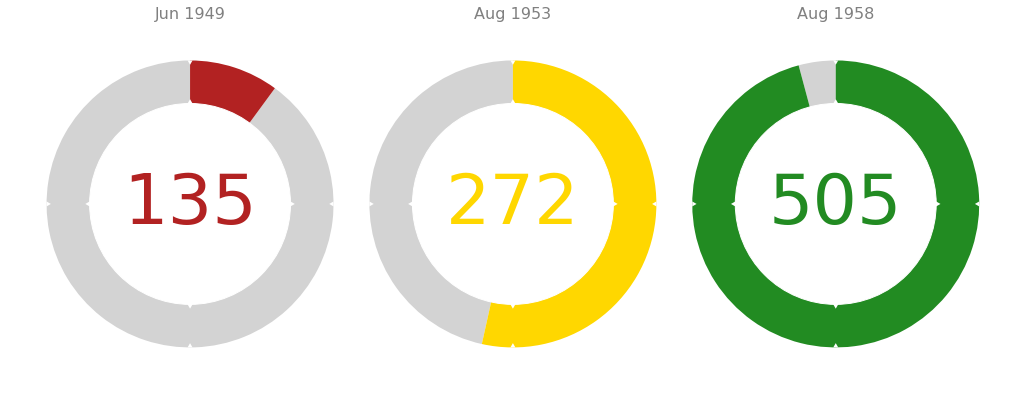

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10))
plt.subplots_adjust(hspace = 0.065, wspace = -0.1)
days_to_plot = [5, 55, 115]

for i, day in enumerate(days_to_plot):
    
    if i == 0:
        ax = axs[0]
    elif i == 1:
        ax = axs[1]
    elif i == 2:
        ax = axs[2]

    generate_BAN_doughnut(
        df, 
        'value',
        ['firebrick', 'gold', 'gold', 'forestgreen'], 
        day,
        title = generate_title(df.loc[day, 'Date'], include_day = False),
        ax = ax
    )
    
fig.savefig('Figures/air_passenger_plots', dpi = 500, bbox_inches = 'tight')